# Economic Freedom Index

https://www.heritage.org/index/?version=182

https://www.heritage.org/index/explore?view=by-variables&u=637490230282383003

In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

In [2]:
economic_freedom = pd.read_csv('economic_freedom_index.csv')
economic_freedom.head()

,Country,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,91.7,80.3,99.3,49.2,60.4,76.7,66.0,10.0,10.0,7.0,20.0,20.0,5.0,25.6,35.5,$69.60,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,86.3,73.9,80.6,69.3,52.7,81.5,87.8,70.0,70.0,1.1,23.0,15.0,24.9,29.5,2.9,$36.00,3.9,2.5,"$12,507",13.9,2.0,"1,119.10",71.2
2,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,76.4,48.7,18.7,61.6,49.9,74.9,67.4,30.0,30.0,8.8,35.0,23.0,24.5,41.4,41.5,$632.90,2.0,3.1,"$15,237",10.0,5.6,"1,203.00",25.8
3,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,83.9,80.7,58.2,55.7,58.8,55.4,61.2,30.0,40.0,9.4,17.0,30.0,20.6,25.3,28.2,$190.30,0.7,2.9,"$6,753",8.2,31.7,"-2,254.50",65.3
4,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,69.3,49.5,33.0,56.4,46.9,60.2,70.0,55.0,60.0,7.5,35.0,30.0,30.8,41.0,44.1,$920.20,2.9,0.7,"$20,876",8.7,25.7,"11,857.00",52.6


In [3]:
economic_freedom.Region.unique

<bound method Series.unique of 0                      Asia-Pacific
1                            Europe
2      Middle East and North Africa
3                Sub-Saharan Africa
4                          Americas
                   ...             
163                    Asia-Pacific
164                    Asia-Pacific
165                    Asia-Pacific
166              Sub-Saharan Africa
167              Sub-Saharan Africa
Name: Region, Length: 168, dtype: object>

# Creating New Features 

In [4]:
economic_freedom['Total Freedom'] = economic_freedom['Business Freedom'] + economic_freedom['Labor Freedom'] + economic_freedom['Monetary Freedom'] + economic_freedom['Trade Freedom'] + economic_freedom['Investment Freedom'] + economic_freedom['Financial Freedom']

In [5]:
economic_freedom['Total Tax Rate'] = economic_freedom['Tariff Rate (%)'] + economic_freedom['Income Tax Rate (%)'] + economic_freedom['Corporate Tax Rate (%)']

In [6]:
economic_freedom.head()

,Country,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Total Freedom,Total Tax Rate
0,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,91.7,80.3,99.3,49.2,60.4,76.7,66.0,10.0,10.0,7.0,20.0,20.0,5.0,25.6,35.5,$69.60,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3,272.3,47.0
1,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,86.3,73.9,80.6,69.3,52.7,81.5,87.8,70.0,70.0,1.1,23.0,15.0,24.9,29.5,2.9,$36.00,3.9,2.5,"$12,507",13.9,2.0,"1,119.10",71.2,431.3,39.1
2,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,76.4,48.7,18.7,61.6,49.9,74.9,67.4,30.0,30.0,8.8,35.0,23.0,24.5,41.4,41.5,$632.90,2.0,3.1,"$15,237",10.0,5.6,"1,203.00",25.8,313.8,66.8
3,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,83.9,80.7,58.2,55.7,58.8,55.4,61.2,30.0,40.0,9.4,17.0,30.0,20.6,25.3,28.2,$190.30,0.7,2.9,"$6,753",8.2,31.7,"-2,254.50",65.3,301.1,56.4
4,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,69.3,49.5,33.0,56.4,46.9,60.2,70.0,55.0,60.0,7.5,35.0,30.0,30.8,41.0,44.1,$920.20,2.9,0.7,"$20,876",8.7,25.7,"11,857.00",52.6,348.5,72.5


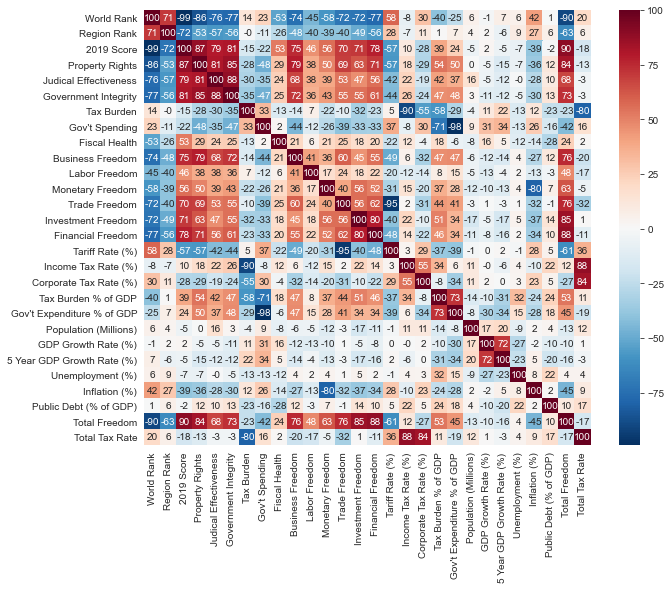

In [7]:
correlations = economic_freedom.corr()

plt.figure(figsize=(10,8))

sns.heatmap(correlations * 100,cmap='RdBu_r',annot=True,fmt='.0f')

plt.show()

# Dividing the Countries by Region

In [8]:
Europe = economic_freedom.loc[economic_freedom['Region']=='Europe']
Europe.head()

,Country,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Total Freedom,Total Tax Rate
1,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,86.3,73.9,80.6,69.3,52.7,81.5,87.8,70.0,70.0,1.1,23.0,15.0,24.9,29.5,2.9,$36.00,3.9,2.5,"$12,507",13.9,2.0,"1,119.10",71.2,431.3,39.1
5,Armenia,Europe,47.0,24.0,67.7,57.2,46.3,38.6,84.7,79.0,53.0,78.3,71.4,77.8,80.8,75.0,70.0,2.1,26.0,20.0,21.3,26.4,3.0,$28.30,7.5,3.6,"$9,456",18.2,0.9,245.7,53.5,453.3,48.1
7,Austria,Europe,31.0,16.0,72.0,84.2,71.3,77.4,50.5,24.5,85.5,74.9,68.7,81.5,86.0,90.0,70.0,2.0,50.0,25.0,42.7,50.2,8.8,$439.60,2.9,1.3,"$49,869",5.5,2.2,"9,629.60",78.8,471.1,77.0
13,Belarus,Europe,104.0,42.0,57.9,55.2,51.7,37.7,89.4,41.3,85.4,75.0,75.3,67.0,76.4,30.0,10.0,1.8,13.0,18.0,23.8,44.2,9.5,$178.90,2.4,-0.3,"$18,931",0.5,6.0,"1,276.40",51.0,333.7,32.8
14,Belgium,Europe,48.0,25.0,67.3,81.3,61.6,72.5,47.1,15.2,73.4,78.1,61.0,76.1,86.0,85.0,70.0,2.0,50.0,29.0,44.2,53.2,11.4,$528.50,1.7,1.2,"$46,553",7.4,2.2,740.4,103.2,456.2,81.0


In [9]:
Middle_East = economic_freedom.loc[economic_freedom['Region']=='Middle East and North Africa']
Middle_East.head()

,Country,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Total Freedom,Total Tax Rate
2,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,76.4,48.7,18.7,61.6,49.9,74.9,67.4,30.0,30.0,8.8,35.0,23.0,24.5,41.4,41.5,$632.90,2.0,3.1,"$15,237",10.0,5.6,"1,203.00",25.8,313.8,66.8
10,Bahrain,Middle East and North Africa,54.0,5.0,66.4,63.5,50.7,53.6,99.7,62.7,3.7,71.4,71.1,81.6,83.8,75.0,80.0,3.1,0.0,0.0,5.6,35.3,1.5,$70.40,3.2,3.8,"$48,505",1.2,1.4,518.9,90.3,462.9,3.1
47,Egypt,Middle East and North Africa,144.0,11.0,52.5,37.0,48.3,29.2,85.2,68.1,0.0,65.9,51.6,62.3,71.8,60.0,50.0,6.6,25.0,23.0,18.0,32.6,94.8,"$1,201.20",4.2,3.8,"$12,671",12.1,23.5,"7,391.70",103.3,361.6,54.6
72,Iran,Middle East and North Africa,155.0,13.0,51.1,33.5,41.3,35.0,80.9,89.8,89.5,62.2,50.7,60.1,54.6,5.0,10.0,15.2,35.0,25.0,8.0,18.5,81.4,"$1,644.70",4.3,3.6,"$20,200",12.5,9.9,"5,019.00",40.9,242.6,75.2
74,Israel,Middle East and North Africa,27.0,2.0,72.8,80.0,73.4,67.9,61.9,52.4,85.3,71.4,65.1,86.2,84.4,75.0,70.0,2.8,48.0,23.0,31.2,39.8,8.7,$316.50,3.3,3.5,"$36,340",4.3,0.2,"18,954.00",61.0,452.1,73.8


In [10]:
Sub_Saharan_Africa = economic_freedom.loc[economic_freedom['Region']=='Sub-Saharan Africa']
Sub_Saharan_Africa.head()

,Country,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Total Freedom,Total Tax Rate
3,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,83.9,80.7,58.2,55.7,58.8,55.4,61.2,30.0,40.0,9.4,17.0,30.0,20.6,25.3,28.2,$190.30,0.7,2.9,"$6,753",8.2,31.7,"-2,254.50",65.3,301.1,56.4
16,Benin,Sub-Saharan Africa,127.0,21.0,55.3,37.2,32.8,28.1,69.3,83.4,27.9,62.4,53.8,86.4,61.8,70.0,50.0,11.6,45.0,30.0,11.9,23.5,11.1,$25.30,5.6,5.0,"$2,277",2.5,0.1,184.4,54.6,384.4,86.6
20,Botswana,Sub-Saharan Africa,36.0,3.0,69.5,58.1,45.7,52.4,82.7,65.9,94.6,68.7,68.2,78.8,83.8,65.0,70.0,0.6,25.0,22.0,24.9,33.7,2.2,$38.90,2.2,4.1,"$17,828",17.4,3.3,400.6,15.6,434.5,47.6
24,Burkina Faso,Sub-Saharan Africa,96.0,9.0,59.4,49.1,42.9,36.6,81.9,80.0,61.8,51.6,52.3,86.2,65.2,65.0,40.0,7.4,27.5,28.0,16.3,25.8,18.9,$35.80,6.4,5.3,"$1,889",6.3,0.4,485.9,38.3,360.3,62.9
26,Burundi,Sub-Saharan Africa,162.0,39.0,48.9,20.6,31.0,26.2,74.0,83.3,23.3,50.3,67.5,62.2,68.2,50.0,30.0,5.9,35.0,35.0,12.3,23.6,10.9,$8.00,0.0,1.1,$735,1.6,16.6,0.3,56.7,328.2,75.9


In [11]:
Asia_Pacific = economic_freedom.loc[economic_freedom['Region']=='Asia-Pacific']
Asia_Pacific.head()

,Country,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Total Freedom,Total Tax Rate
0,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,91.7,80.3,99.3,49.2,60.4,76.7,66.0,10.0,10.0,7.0,20.0,20.0,5.0,25.6,35.5,$69.60,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3,272.3,47.0
6,Australia,Asia-Pacific,5.0,4.0,80.9,79.1,86.5,79.9,62.8,60.1,86.2,88.3,84.1,86.6,87.6,80.0,90.0,1.2,45.0,30.0,28.2,36.5,24.8,"$1,246.50",2.3,2.4,"$50,334",5.6,2.0,"46,368.00",41.6,516.6,76.2
8,Azerbaijan,Asia-Pacific,60.0,13.0,65.4,59.1,53.1,44.7,87.5,59.5,89.4,69.5,63.9,63.0,74.6,60.0,60.0,5.2,25.0,20.0,15.0,36.7,9.8,$171.80,0.1,1.2,"$17,492",5.0,13.0,"2,867.00",54.7,391.0,50.2
11,Bangladesh,Asia-Pacific,121.0,27.0,55.6,36.1,34.5,24.4,72.7,94.5,77.6,50.9,68.2,69.9,63.6,45.0,30.0,10.7,25.0,45.0,8.8,13.6,163.2,$687.10,7.1,6.7,"$4,211",4.4,5.7,"2,151.60",32.4,327.6,80.7
17,Bhutan,Asia-Pacific,74.0,16.0,62.9,62.5,55.4,54.5,83.0,71.6,77.6,68.7,79.5,72.6,79.4,20.0,30.0,2.8,25.0,30.0,13.4,30.7,0.8,$7.00,6.0,5.2,"$8,744",2.4,3.4,10.3,102.4,350.2,57.8


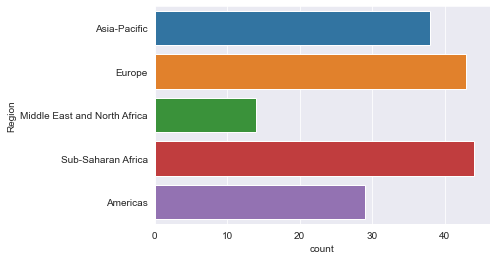

In [12]:
sns.countplot(y='Region', data=economic_freedom)
plt.show()

In [13]:
print(len(Europe))
print(len(Middle_East))
print(len(Sub_Saharan_Africa))
print(len(Asia_Pacific))

43
14
44
38


This is to get an exact number of the countries by Region.

In [14]:
Europe = pd.DataFrame(Europe)
Middle_East = pd.DataFrame(Middle_East)
Sub_Saharan_Africa = pd.DataFrame(Sub_Saharan_Africa)
Asia_Pacific = pd.DataFrame(Asia_Pacific)

In [15]:
print(Europe['2019 Score'].mean())
print(Middle_East['2019 Score'].mean())
print(Sub_Saharan_Africa['2019 Score'].mean())
print(Asia_Pacific['2019 Score'].mean())

68.66511627906978
61.25714285714287
54.69545454545453
61.121052631578955


In [16]:
print(Europe['2019 Score'].head().mean())
print(Middle_East['2019 Score'].head().mean())
print(Sub_Saharan_Africa['2019 Score'].head().mean())
print(Asia_Pacific['2019 Score'].head().mean())

66.28
57.8
56.739999999999995
63.260000000000005


I decided to use the head and tail function to have an equal sample of the countries from the respective regions to avoid potential bias in the mean.It did seem to make.When using head(), the mean of the Asia Pacific region is higher than the Middle East region. 

In [17]:
print(Europe['2019 Score'].tail().mean())
print(Middle_East['2019 Score'].tail().mean())
print(Sub_Saharan_Africa['2019 Score'].tail().mean())
print(Asia_Pacific['2019 Score'].tail().mean())

70.58
65.46000000000001
52.839999999999996
54.21999999999999


In [18]:
Europe.describe()

,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),GDP Growth Rate (%),5 Year GDP Growth Rate (%),Unemployment (%),Inflation (%),Public Debt (% of GDP),Total Freedom,Total Tax Rate
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.00000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,48.813953,22.418605,68.665116,70.330233,56.662791,56.069767,71.627907,45.997674,84.809302,74.820930,61.048837,79.846512,84.323256,75.116279,63.255814,2.197674,31.506977,19.553488,34.02093,41.758140,19.223256,3.453488,2.451163,8.772093,2.604651,60.858140,438.411628,53.258140
std,33.189396,12.985766,6.927649,13.786027,15.641733,21.241094,14.380631,18.956196,15.153639,9.549709,11.125804,5.855740,3.354303,15.137795,15.231692,0.904615,15.201291,5.962316,6.75685,7.600101,29.979206,1.779426,2.017468,5.643805,2.685584,33.533602,43.961987,19.212871
min,4.000000,1.000000,52.300000,40.200000,29.600000,25.400000,42.000000,3.900000,23.200000,49.700000,39.000000,58.600000,75.000000,30.000000,10.000000,0.700000,9.000000,9.000000,21.30000,26.400000,0.300000,0.000000,-2.300000,0.500000,0.300000,8.800000,311.400000,20.600000
25%,20.500000,11.500000,64.250000,59.050000,45.750000,38.150000,60.350000,33.000000,81.600000,67.050000,52.600000,78.350000,82.900000,70.000000,60.000000,2.000000,16.500000,15.400000,29.10000,36.150000,2.950000,2.250000,1.250000,4.850000,1.300000,37.300000,423.650000,36.000000
50%,44.000000,22.000000,68.100000,71.500000,51.700000,49.800000,74.900000,46.200000,87.200000,75.200000,61.200000,81.500000,86.000000,80.000000,70.000000,2.000000,32.000000,20.000000,34.00000,42.300000,7.000000,3.100000,2.500000,6.700000,1.900000,52.600000,441.400000,53.300000
75%,68.500000,33.500000,74.550000,82.750000,69.850000,77.700000,84.500000,60.700000,96.450000,80.700000,70.050000,83.350000,86.000000,85.000000,70.000000,2.000000,45.000000,23.000000,38.20000,47.250000,14.250000,4.250000,3.200000,11.200000,2.550000,75.500000,467.000000,72.000000
max,147.000000,44.000000,81.900000,92.300000,85.900000,92.500000,91.800000,79.000000,99.800000,92.900000,86.400000,88.000000,88.600000,95.000000,90.000000,6.500000,57.000000,35.000000,45.90000,56.600000,144.000000,7.800000,9.700000,25.600000,14.400000,181.900000,517.200000,81.500000


In [19]:
Middle_East.describe()

,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),GDP Growth Rate (%),5 Year GDP Growth Rate (%),Unemployment (%),Inflation (%),Public Debt (% of GDP),Total Freedom,Total Tax Rate
count,14.000000,14.0000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,90.285714,7.5000,61.257143,54.442857,51.685714,46.714286,87.721429,60.764286,48.578571,67.514286,57.164286,76.671429,77.200000,53.571429,52.857143,5.150000,18.035714,15.607143,13.371429,35.214286,24.257143,1.835714,2.742857,7.071429,4.221429,61.500000,384.978571,38.792857
std,52.835636,4.1833,9.324304,15.540306,15.388450,18.404383,12.594637,18.817447,38.621839,8.579031,11.929382,7.739452,8.657944,19.258222,18.575655,3.695059,17.750909,11.101245,8.829882,8.548041,30.117225,2.029629,1.098751,5.263726,6.225157,38.853492,57.771089,29.985393
min,9.000000,1.0000,46.200000,31.600000,26.600000,18.200000,61.900000,17.300000,0.000000,47.900000,33.100000,60.100000,54.600000,5.000000,10.000000,1.500000,0.000000,0.000000,1.600000,18.500000,1.500000,-2.500000,-0.100000,0.100000,-0.900000,17.300000,242.600000,2.800000
25%,53.250000,4.2500,53.225000,41.925000,42.850000,35.075000,77.525000,53.500000,16.750000,61.900000,50.400000,75.175000,72.850000,45.000000,50.000000,3.000000,0.000000,4.875000,6.275000,29.900000,4.425000,0.675000,2.350000,2.400000,0.950000,29.575000,361.525000,10.500000
50%,89.000000,7.5000,60.900000,56.100000,49.500000,44.500000,91.600000,65.400000,49.250000,70.750000,55.000000,78.100000,79.000000,60.000000,60.000000,3.600000,17.000000,17.500000,11.350000,33.950000,9.400000,2.050000,3.200000,6.050000,1.800000,57.500000,392.000000,38.150000
75%,139.250000,10.7500,66.475000,62.225000,58.150000,53.750000,98.850000,73.225000,88.000000,72.075000,64.650000,81.425000,83.650000,65.000000,60.000000,6.075000,35.000000,23.000000,20.100000,39.325000,34.275000,3.275000,3.475000,11.575000,5.100000,85.550000,421.325000,70.550000
max,171.000000,14.0000,77.600000,81.800000,87.100000,78.800000,99.800000,89.800000,99.100000,79.900000,81.100000,86.200000,87.000000,75.000000,80.000000,15.200000,48.000000,30.000000,31.200000,52.500000,94.800000,4.300000,3.800000,15.400000,23.500000,152.800000,462.900000,75.200000


In [20]:
Sub_Saharan_Africa.describe()

,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),GDP Growth Rate (%),5 Year GDP Growth Rate (%),Unemployment (%),Inflation (%),Public Debt (% of GDP),Total Freedom,Total Tax Rate
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.00000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,126.409091,23.386364,54.695455,38.790909,36.997727,31.259091,75.465909,77.231818,55.088636,53.034091,55.60000,73.052273,66.297727,53.068182,40.454545,9.236364,32.681818,29.840909,17.602273,26.243182,22.497727,3.647727,3.790909,8.456818,7.497727,55.186364,341.506818,71.759091
std,37.211725,13.024513,6.630688,11.604887,11.725335,10.041317,9.072728,14.700163,30.207655,10.820006,13.14803,8.658092,10.474587,15.819325,13.110363,4.625716,10.005865,6.057642,7.635580,8.463146,33.360647,2.871471,2.691746,7.524144,9.130590,26.678025,48.015716,14.609400
min,25.000000,1.000000,40.400000,19.600000,18.100000,14.300000,46.100000,27.300000,0.000000,24.200000,29.30000,49.100000,45.000000,5.000000,10.000000,0.600000,10.000000,15.000000,5.200000,10.600000,0.200000,-4.400000,-5.600000,0.400000,-0.900000,15.600000,238.000000,30.800000
25%,107.500000,12.750000,50.300000,31.875000,30.350000,25.375000,70.450000,70.600000,23.025000,48.275000,45.65000,66.375000,61.100000,45.000000,30.000000,6.125000,29.375000,25.000000,12.400000,20.850000,2.175000,2.500000,2.775000,3.425000,1.250000,37.975000,307.475000,62.800000
50%,133.000000,23.500000,54.350000,36.200000,34.850000,28.850000,76.000000,80.050000,62.450000,53.550000,55.30000,73.950000,66.800000,55.000000,40.000000,9.500000,35.000000,30.000000,16.400000,25.800000,12.600000,3.750000,4.000000,5.950000,5.300000,52.600000,345.950000,72.150000
75%,157.250000,34.250000,57.650000,42.900000,42.900000,35.500000,80.850000,86.900000,82.400000,57.700000,61.75000,79.550000,72.150000,65.000000,50.000000,12.125000,36.250000,32.250000,20.825000,31.350000,26.250000,5.350000,5.425000,10.000000,9.150000,61.450000,368.550000,81.275000
max,175.000000,45.000000,73.000000,72.200000,83.200000,67.900000,92.100000,96.600000,96.900000,79.800000,85.10000,86.400000,88.400000,80.000000,70.000000,17.500000,60.000000,50.000000,47.000000,49.200000,188.700000,10.900000,9.900000,27.300000,41.500000,126.000000,458.400000,121.400000


In [21]:
Asia_Pacific.describe()

,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),GDP Growth Rate (%),5 Year GDP Growth Rate (%),Unemployment (%),Inflation (%),Public Debt (% of GDP),Total Freedom,Total Tax Rate
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,91.815789,21.605263,61.121053,53.944737,46.036842,40.163158,82.676316,71.289474,69.926316,67.178947,64.615789,75.184211,74.697368,45.526316,42.105263,5.215789,24.707895,22.784211,17.423684,29.376316,108.428947,4.544737,4.342105,4.171053,3.847368,47.365789,369.307895,52.707895
std,46.770200,11.291086,8.939985,17.141268,17.617397,17.261634,9.536967,19.297693,30.052564,14.710029,14.353350,6.554121,8.922746,20.950052,19.885876,3.720253,13.051507,9.431332,6.966229,9.850928,303.445887,2.276519,2.330019,2.368819,3.086828,39.252304,65.288815,19.854190
min,3.000000,3.000000,44.200000,19.600000,13.100000,16.700000,62.800000,0.900000,6.200000,29.900000,20.000000,58.900000,56.800000,10.000000,10.000000,0.000000,0.000000,0.000000,5.000000,13.600000,0.100000,-0.500000,-1.400000,0.200000,-0.400000,0.000000,219.400000,7.800000
25%,59.250000,12.250000,55.225000,42.100000,34.350000,30.000000,76.950000,60.275000,50.825000,60.025000,58.725000,70.025000,65.550000,30.000000,30.000000,2.500000,14.750000,20.000000,12.800000,21.725000,1.675000,3.025000,2.825000,2.475000,1.675000,28.825000,328.875000,41.450000
50%,103.000000,21.500000,58.100000,49.900000,42.700000,35.200000,83.850000,72.900000,80.400000,67.950000,63.900000,74.700000,75.900000,47.500000,40.000000,4.200000,25.000000,25.000000,15.950000,30.050000,17.100000,4.650000,4.300000,3.900000,3.400000,41.750000,356.650000,57.000000
75%,128.750000,30.750000,65.400000,61.875000,56.075000,47.025000,90.450000,85.875000,93.125000,76.575000,74.025000,79.200000,80.300000,60.000000,60.000000,7.600000,34.500000,29.500000,20.700000,36.400000,52.325000,6.700000,6.500000,5.150000,5.075000,57.325000,414.900000,67.025000
max,172.000000,42.000000,84.400000,95.000000,86.500000,96.700000,97.300000,94.500000,100.000000,93.200000,90.800000,87.500000,92.400000,85.000000,90.000000,14.100000,46.200000,45.000000,32.100000,57.500000,1390.100000,9.300000,7.900000,10.300000,13.000000,236.400000,517.600000,84.100000


# Looking at the Lowest Ranking Countries by Region

In [22]:
Europe.loc[Europe['2019 Score'] < 60]

,Country,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Total Freedom,Total Tax Rate
13,Belarus,Europe,104.0,42.0,57.9,55.2,51.7,37.7,89.4,41.3,85.4,75.0,75.3,67.0,76.4,30.0,10.0,1.8,13.0,18.0,23.8,44.2,9.5,$178.90,2.4,-0.3,"$18,931",0.5,6.0,"1,276.40",51.0,333.7,32.8
61,Greece,Europe,106.0,43.0,57.7,52.4,49.5,37.7,59.1,23.3,79.0,74.1,52.5,79.1,81.0,55.0,50.0,2.0,42.0,29.0,38.6,50.6,10.8,$298.70,1.4,-0.3,"$27,737",21.5,1.1,"4,046.00",181.9,391.7,73.0
102,Moldova,Europe,97.0,40.0,59.1,55.2,29.6,25.4,85.4,59.1,92.0,67.0,39.0,73.5,78.0,55.0,50.0,3.5,18.0,12.0,31.5,36.9,3.5,$20.10,4.0,4.4,"$5,661",4.5,6.6,213.8,37.7,362.5,33.5
126,Russia,Europe,98.0,41.0,58.9,52.4,45.1,36.6,89.4,62.3,86.6,78.4,52.5,65.1,77.8,30.0,30.0,3.6,13.0,20.0,22.2,35.4,144.0,"$4,007.80",1.5,0.3,"$27,834",5.2,3.7,"25,284.00",17.4,333.8,36.6
158,Ukraine,Europe,147.0,44.0,52.3,43.9,31.5,29.6,81.8,46.9,82.6,66.1,46.7,58.6,75.0,35.0,30.0,2.5,20.0,18.0,33.1,42.1,42.3,$368.80,2.5,-2.3,"$8,713",9.5,14.4,"2,202.00",75.6,311.4,40.5


In [23]:
Middle_East.loc[Middle_East['2019 Score'] < 50]

,Country,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Total Freedom,Total Tax Rate
2,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,76.4,48.7,18.7,61.6,49.9,74.9,67.4,30.0,30.0,8.8,35.0,23.0,24.5,41.4,41.5,$632.90,2.0,3.1,"$15,237",10.0,5.6,"1,203.00",25.8,313.8,66.8


In [24]:
Sub_Saharan_Africa.loc[Sub_Saharan_Africa['2019 Score'] < 50]

,Country,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Total Freedom,Total Tax Rate
26,Burundi,Sub-Saharan Africa,162.0,39.0,48.9,20.6,31.0,26.2,74.0,83.3,23.3,50.3,67.5,62.2,68.2,50.0,30.0,5.9,35.0,35.0,12.3,23.6,10.9,$8.00,0.0,1.1,$735,1.6,16.6,0.3,56.7,328.2,75.9
31,Central African Republic,Sub-Saharan Africa,161.0,38.0,49.1,19.6,29.6,23.2,65.2,94.2,94.3,24.2,40.1,72.3,51.0,45.0,30.0,14.5,50.0,30.0,9.0,13.9,5.0,$3.40,4.0,-4.5,$677,6.0,3.8,17.2,53.4,262.6,94.5
32,Chad,Sub-Saharan Africa,159.0,36.0,49.9,26.7,24.6,23.2,46.1,92.4,85.2,28.1,43.2,82.3,47.2,60.0,40.0,16.4,60.0,45.0,5.3,15.9,12.2,$28.60,-3.1,1.0,"$2,344",5.9,-0.9,335,52.5,300.8,121.4
44,Djibouti,Sub-Saharan Africa,169.0,43.0,47.1,29.7,18.1,28.1,76.2,27.3,18.1,54.7,60.4,72.7,50.4,80.0,50.0,17.3,30.0,25.0,29.2,49.2,1.0,$3.60,6.7,6.1,"$3,559",5.8,0.7,165,30.6,368.2,72.3
49,Equatorial Guinea,Sub-Saharan Africa,174.0,44.0,41.0,29.7,18.1,15.8,71.3,67.6,16.4,37.6,32.7,83.7,48.8,40.0,30.0,15.6,35.0,35.0,20.4,32.8,0.8,$30.40,-4.4,-5.6,"$36,017",6.9,0.7,304.1,42.7,272.8,85.6
88,Liberia,Sub-Saharan Africa,160.0,37.0,49.7,26.7,39.0,24.2,82.7,62.1,69.1,50.6,38.3,68.9,60.1,55.0,20.0,12.4,25.0,25.0,21.8,35.5,4.5,$6.10,2.5,2.1,"$1,354",2.4,12.4,247.8,34.4,292.9,62.4
106,Mozambique,Sub-Saharan Africa,163.0,40.0,48.6,33.9,35.2,28.1,75.5,66.9,16.6,57.1,42.0,65.4,78.0,35.0,50.0,3.5,32.0,32.0,20.2,33.2,29.5,$36.70,3.0,5.6,"$1,244",25.0,15.3,"2,293.10",102.2,327.5,67.5
135,Sierra Leone,Sub-Saharan Africa,167.0,42.0,47.5,35.5,34.5,26.2,87.3,84.4,13.2,44.9,29.3,65.0,69.4,60.0,20.0,10.3,15.0,30.0,12.2,22.8,7.4,$11.50,3.5,2.9,"$1,553",4.5,18.0,560,58.4,288.6,55.3
142,Sudan,Sub-Saharan Africa,166.0,41.0,47.7,27.5,22.2,26.2,86.3,96.6,76.1,52.1,59.0,56.9,45.0,5.0,20.0,17.5,10.0,35.0,6.7,10.6,40.8,$187.00,3.2,3.0,"$4,586",12.7,32.4,"1,065.30",126.0,238.0,62.5
167,Zimbabwe,Sub-Saharan Africa,175.0,45.0,40.4,29.7,24.8,15.8,62.3,74.5,23.7,33.4,43.3,72.4,70.0,25.0,10.0,5.0,51.5,25.0,22.3,29.2,14.9,$34.00,3.0,2.6,"$2,283",5.0,1.3,289.4,78.4,254.1,81.5


In [25]:
Asia_Pacific.loc[Asia_Pacific['2019 Score'] < 50]

,Country,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Total Freedom,Total Tax Rate
150,Timor-Leste,Asia-Pacific,172.0,42.0,44.2,29.7,13.1,32.1,96.3,0.9,20.0,60.5,58.8,79.5,75.0,45.0,20.0,2.5,10.0,10.0,13.1,57.5,1.2,$6.80,-0.5,3.1,"$5,444",3.4,0.6,6.7,0.0,338.8,22.5
156,Turkmenistan,Asia-Pacific,164.0,40.0,48.4,31.6,29.8,20.3,95.9,92.0,92.3,30.0,20.0,73.4,76.0,10.0,10.0,2.0,10.0,8.0,15.6,16.4,5.7,$103.50,6.5,7.9,"$18,126",3.4,8.0,"2,313.50",28.8,219.4,20.0


# Overall 

In [26]:
economic_freedom.loc[economic_freedom['2019 Score'] < 45]

,Country,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Total Freedom,Total Tax Rate
18,Bolivia,Americas,173.0,30.0,42.3,20.5,12.3,19.7,82.4,49.3,17.6,58.8,52.9,68.8,70.4,15.0,40.0,4.8,13.0,25.0,31.1,41.1,11.1,$83.60,4.2,5.1,"$7,547",3.1,2.8,724.7,50.9,305.9,42.8
49,Equatorial Guinea,Sub-Saharan Africa,174.0,44.0,41.0,29.7,18.1,15.8,71.3,67.6,16.4,37.6,32.7,83.7,48.8,40.0,30.0,15.6,35.0,35.0,20.4,32.8,0.8,$30.40,-4.4,-5.6,"$36,017",6.9,0.7,304.1,42.7,272.8,85.6
150,Timor-Leste,Asia-Pacific,172.0,42.0,44.2,29.7,13.1,32.1,96.3,0.9,20.0,60.5,58.8,79.5,75.0,45.0,20.0,2.5,10.0,10.0,13.1,57.5,1.2,$6.80,-0.5,3.1,"$5,444",3.4,0.6,6.7,0.0,338.8,22.5
167,Zimbabwe,Sub-Saharan Africa,175.0,45.0,40.4,29.7,24.8,15.8,62.3,74.5,23.7,33.4,43.3,72.4,70.0,25.0,10.0,5.0,51.5,25.0,22.3,29.2,14.9,$34.00,3.0,2.6,"$2,283",5.0,1.3,289.4,78.4,254.1,81.5


The strongest features factoring in the 2019 Score are 

-Total Freedom (the new feature): 90

-Property Rights: 87 

-Government Integrity: 81 

-Judicial Effectiveness: 79 

-Financial Freedom: 78

Since it would be redundant to include the freedom variables as they have already been added together for a new variable, they will be removed.

In [28]:
economic_freedom.drop(['Business Freedom','Labor Freedom','Monetary Freedom','Trade Freedom','Investment Freedom','Financial Freedom'],axis=1, inplace=True)

In [29]:
economic_freedom.to_csv('econ_freedom_index.csv', index=None)